# Project 1 : Adiabatic flame temperature 

In [47]:
import numpy as np
import cantera as ct
import matplotlib.pyplot as plt

### Problem 1

HE is added to the 'gri30_highT.cti' and named as 'gri30_highT_withHE.cti'. The cantera file is updated accordingly. 

In [48]:
gas=ct.Solution('gri30_highT_withHE.cti')
gas.basis='molar'

## Problem 2
Finding adiabatic flame temperature for CO, H2, CH4, C2H6,C2H4, C2H2 and C3H8 in air. So the oxidizer is O2 and 3.76 N2 

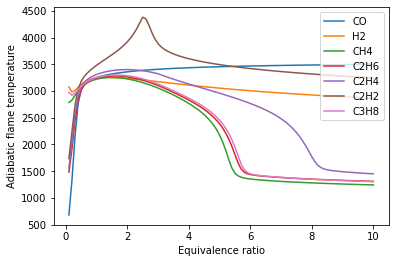

In [49]:
n=100  # no of equivalence ratio
fuel_range=['CO','H2','CH4','C2H6','C2H4','C2H2','C3H8'] # fuel 
ox_range  =['O2']
eq_range  =np.linspace(0.1,10,n)
ad_flame  =np.zeros((len(fuel_range),n))

# define constant properties
T=300
P=101325


gas.TP=T,P
fig= plt.figure()
for fuel in fuel_range:
    f_index= fuel_range.index(fuel)
    f_mix = fuel+':1'
    o_mix = ox_range[0]+':1,N2:3.76'
    for phi in eq_range:
        phi_index= np.where(eq_range==phi)
        gas.set_equivalence_ratio(phi,f_mix,o_mix)
        gas.equilibrate('HP')
        ad_flame[f_index][phi_index[0]]= gas.T
        #print('The adiabatic flame temp of',fuel, ': ',str(ad_flame[f_index][phi_index[0]]),'K')
    plt.plot(eq_range,ad_flame[f_index][:],label=fuel)
    
plt.legend(loc='upper right')
plt.xlabel('Equivalence ratio')
plt.ylabel('Adiabatic flame temperature')
plt.show()
        
        
    

## Problem 3 

The fuel is 'C3H8' and the oxidizer is air $(O_2 + 3.76 N_2)$ 

In [50]:
fuel3='C3H8'
ox3='O2:1,N2:3.76'



# define constant properties
T3= 300
P3= ct.one_atm
gas.TP = T3,P3
ad_t3=[]
X_CO2=[]
X_H2O=[]

# list of pollutants
X_CO=[]
X_NO=[]
X_NO2=[]
X_Cs=[]

for phi in eq_range:
    gas.set_equivalence_ratio(phi,fuel3,ox3)
    gas.equilibrate('HP')
    ad_t3.append(gas.T)
    X_CO2.append(gas.X[gas.species_index('CO2')])
    X_H2O.append(gas.X[gas.species_index('H2O')])
    X_CO.append(gas.X[gas.species_index('CO')])
    X_NO.append(gas.X[gas.species_index('NO')])
    X_NO2.append(gas.X[gas.species_index('NO2')])
    X_Cs.append(gas.X[gas.species_index('C')])
    #print('Mole fraction CO2:',gas.X[nCO2])
    

Text(0, 0.5, 'Tad')

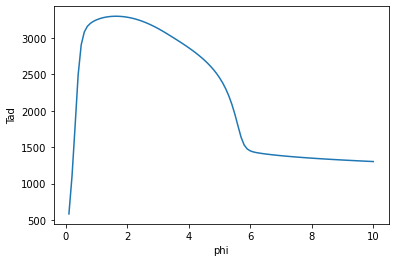

In [51]:
fig2=plt.figure()
plt.plot(eq_range,ad_t3)
plt.xlabel('phi')
plt.ylabel('Tad')


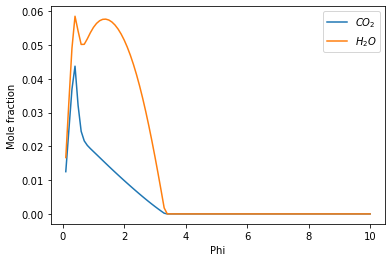

In [52]:
fig3= plt.figure()
plt.plot(eq_range,X_CO2,label='$CO_2$')
plt.plot(eq_range,X_H2O,label='$H_2O$')
plt.xlabel('Phi')
plt.ylabel('Mole fraction')
plt.legend()

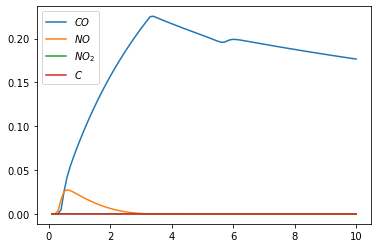

In [53]:
fig4=plt.figure()
plt.plot(eq_range,X_CO,label='$CO$')
plt.plot(eq_range,X_NO,label='$NO$')
plt.plot(eq_range,X_NO2,label='$NO_2$')
plt.plot(eq_range,X_Cs,label='$C$')
plt.legend()


## Problem 4 

The adiabatic flame temperature for the same fuel but different oxidizers


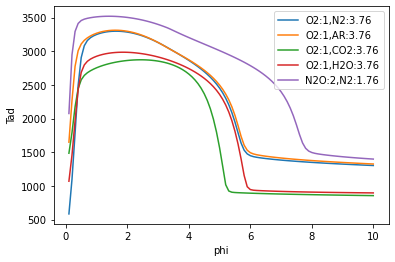

In [60]:
fuel4 = 'C3H8'
ox4 =['O2:1,N2:3.76','O2:1,AR:3.76','O2:1,CO2:3.76','O2:1,H2O:3.76','N2O:2,N2:1.76'] # without helium

#define constant properties
T4=300
P4=ct.one_atm

gas.TP=T4,P4

Tad4 = np.zeros((len(ox4),n))

fig4=plt.figure()

for ox in ox4:
    for phi in eq_range:
        phi_index= np.where(eq_range==phi)
        gas.set_equivalence_ratio(phi,fuel4,ox)
        gas.equilibrate('HP')
        Tad4[ox4.index(ox)][phi_index[0]]=gas.T
    plt.plot(eq_range,Tad4[ox4.index(ox)][:],label=ox)
    plt.xlabel('phi')
    plt.ylabel('Tad')
    plt.legend()

CanteraError: 
***********************************************************************
CanteraError thrown by Phase::species:
Unknown species 'HE'
***********************************************************************
